### 1. Importing libraries and data and subsetting

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
df = pd.read_csv(r'C:\Users\User\OneDrive\Dokumentumok\CF\Achievement 6\Boat_Sales\02 Data\Prepared Data\boat_data_clean7.csv')

In [4]:
df.shape

(6299, 18)

In [5]:
df.head()

,Unnamed: 0,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,Currency,Price_in_CHF,Views category,Country,City,Other,Boat_ID
0,0,3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75,EUR,3295,Low number of views,Germany,Bönningstedt,NaN,1
1,1,3770,Sport Boat,Marine power boats,new boat from stock,2008,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124,CHF,3770,Middle number of views,Switzerland,Lake of Zurich,Stäfa ZH,2
2,2,3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58,EUR,3209,Very low number of views,Germany,Bayern,München,3
3,3,3650,Sport Boat,Linder power boats,new boat from stock,2008,4.03,1.56,Aluminium,Switzerland Â» Lake Constance Â» Uttwil,132,CHF,3650,Middle number of views,Switzerland,Lake Constance,Uttwil,4
4,4,3500,Fishing Boat,Terhi power boats,"Used boat,Electric",1987,4.35,1.75,GRP,Switzerland Â» Seengen,239,CHF,3500,High number of views,Switzerland,Seengen,NaN,5


#### Subsetting

In [7]:
df2 = df[['Year Built', 'Length', 'Width', 'Number of views last 7 days', 'Price_in_CHF']]

In [8]:
df2.head()

,Year Built,Length,Width,Number of views last 7 days,Price_in_CHF
0,2020,4.00,1.50,75,3295
1,2008,3.69,1.42,124,3770
2,2019,3.55,1.46,58,3209
3,2008,4.03,1.56,132,3650
4,1987,4.35,1.75,239,3500


### 2. The elbow technique

In [9]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [11]:
score = [kmeans[i].fit(df2).score(df2) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

[-2387107770655907.0,
 -1036869683355231.9,
 -595545399638715.1,
 -371388415232175.9,
 -222628790447120.5,
 -150673178628992.28,
 -106329779562991.69,
 -71786705681948.08,
 -52397441923925.984]

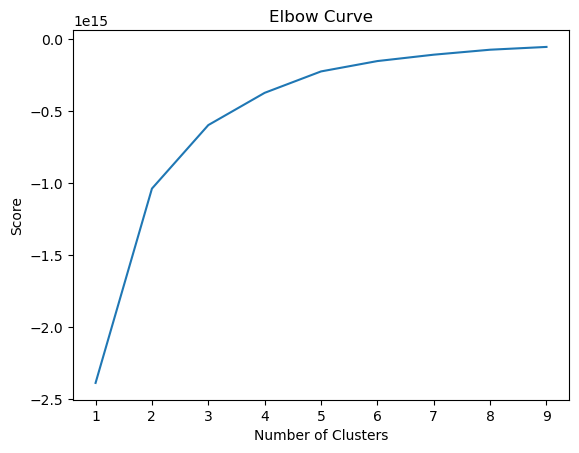

In [12]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#####  In this case, there's a significan jump from 4 to 5 on the x-axis, but after that, the curve straightens out. This means that the optimal count for your clusters is 5.

### 3. k-means clustering

In [13]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 5) 

In [14]:
# Fit the k-means object to the data.

kmeans.fit(df2)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5)

In [15]:
df2['clusters'] = kmeans.fit_predict(df2)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\AppData\Local\Temp\ipykernel_15016\3385428573.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['clusters'] = kmeans.fit_predict(df2)


In [17]:
df2.head()

,Year Built,Length,Width,Number of views last 7 days,Price_in_CHF,clusters
0,2020,4.00,1.50,75,3295,0
1,2008,3.69,1.42,124,3770,0
2,2019,3.55,1.46,58,3209,0
3,2008,4.03,1.56,132,3650,0
4,1987,4.35,1.75,239,3500,0


In [19]:
df2['clusters'].value_counts()

clusters
0    5645
2     546
4      87
1      20
3       1
Name: count, dtype: int64

In [20]:
df2.columns

Index(['Year Built', 'Length', 'Width', 'Number of views last 7 days',
       'Price_in_CHF', 'clusters'],
      dtype='object')

### 4. Visualisations

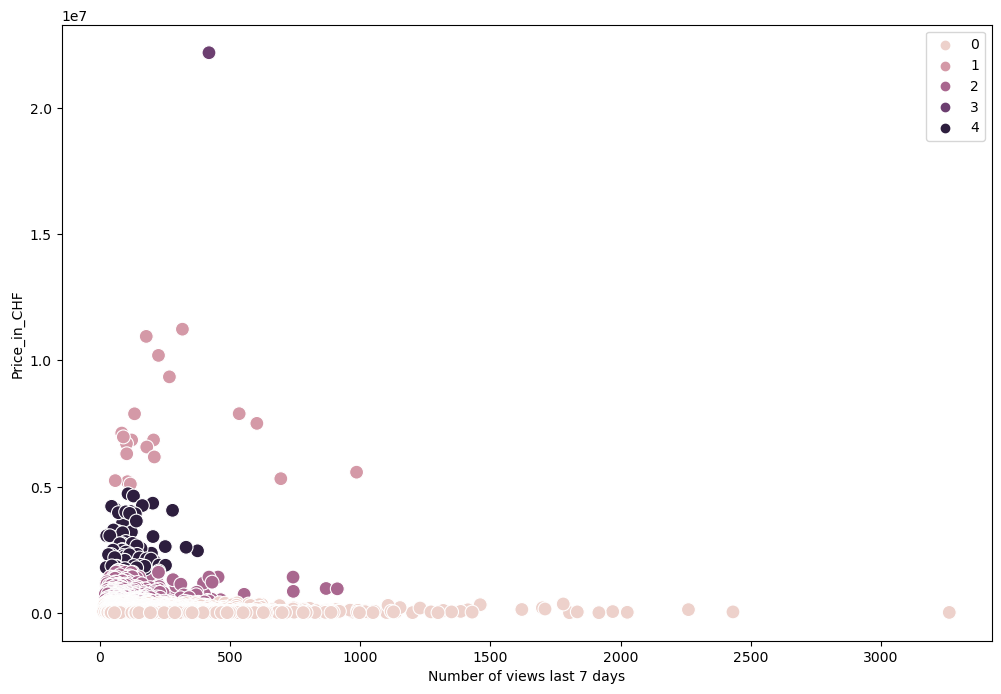

In [29]:
# Plot the clusters

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df2['Number of views last 7 days'], y=df2['Price_in_CHF'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Number of views last 7 days') # Label x-axis.
plt.ylabel('Price_in_CHF') # Label y-axis.
plt.show()

The cheaper boats has the higher number of views.The clusters are well separated from each other in the figure.

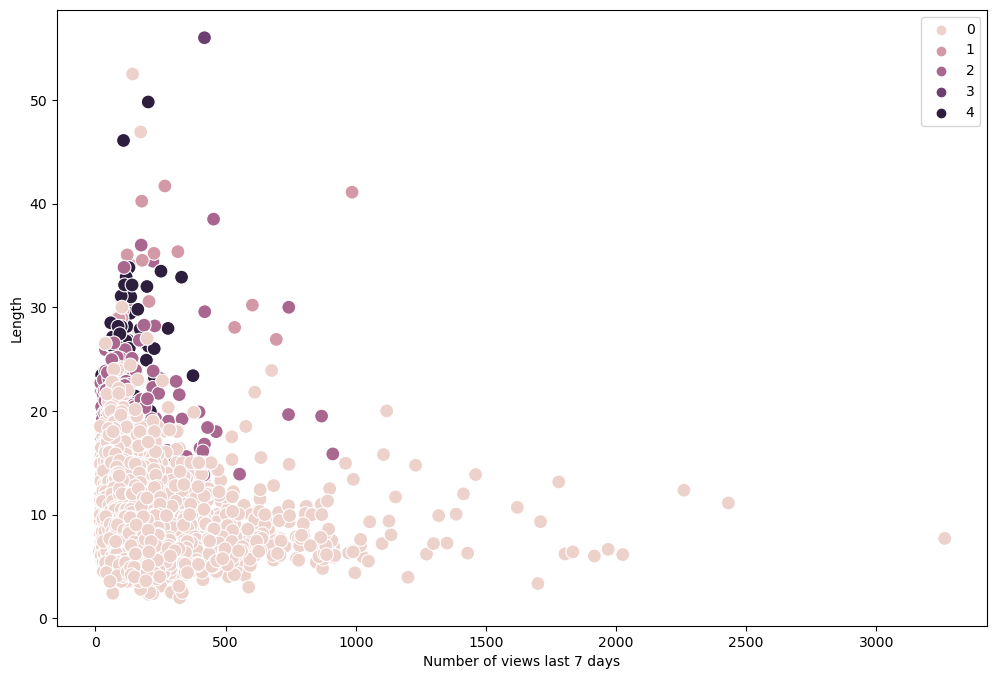

In [28]:
# Plot the clusters

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df2['Number of views last 7 days'], y=df2['Length'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Number of views last 7 days') # Label x-axis.
plt.ylabel('Length') # Label y-axis.
plt.show()

The clusters are not well separated from each other in the figure.

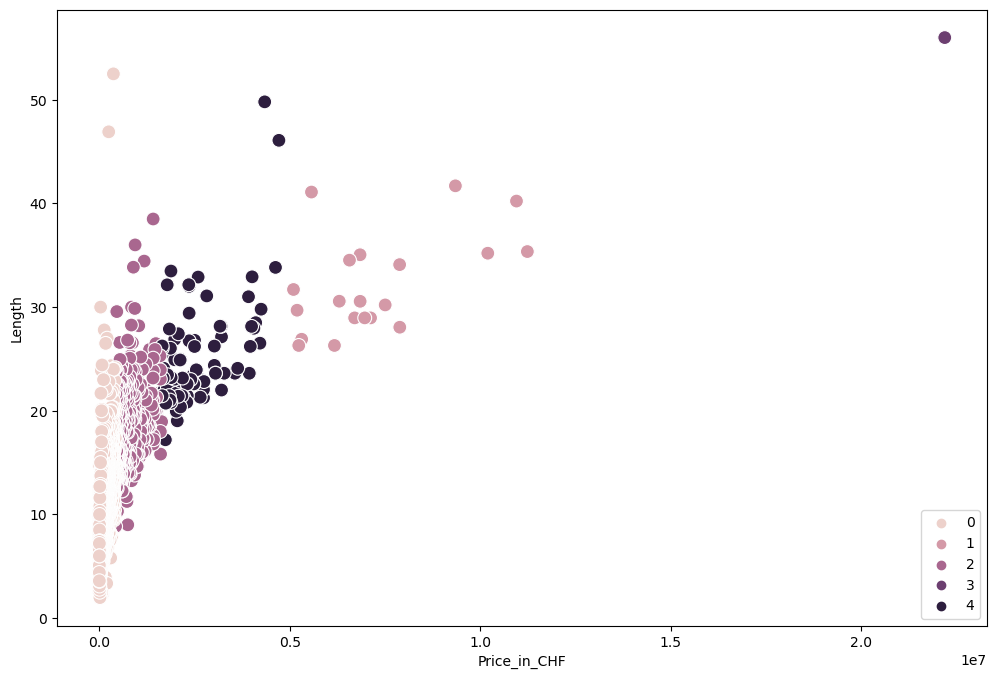

In [27]:
# Plot the clusters

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df2['Price_in_CHF'], y=df2['Length'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Price_in_CHF') # Label x-axis.
plt.ylabel('Length') # Label y-axis.
plt.show()

The clusters are separated from each other in the figure. The cheaper boats are short, but in the short boats can be expensive ones too. Longer boats are usually more expensive.

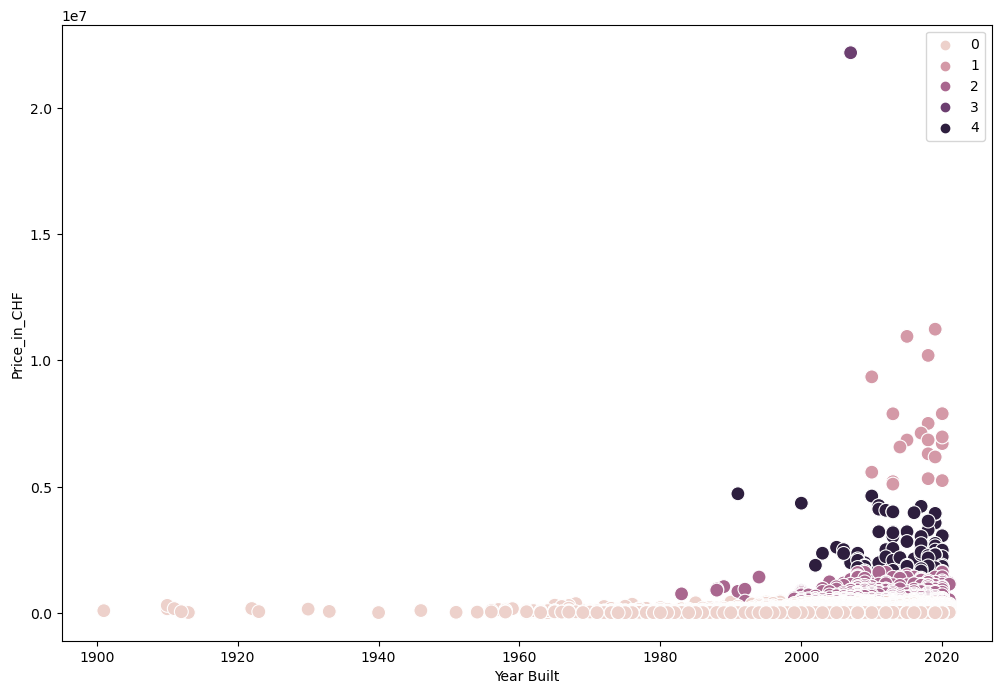

In [21]:
# Plot the clusters

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df2['Year Built'], y=df2['Price_in_CHF'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Year Built') # Label x-axis.
plt.ylabel('Price_in_CHF') # Label y-axis.
plt.show()

The clusters are separated from each other in the figure. The old boats are cheaper, but in the new boats can be cheap and expensive ones too. The most expensive boats were made between 2010-2020.

### 5. Descriptive statistics for the clusters

In [30]:
df2.loc[df2['clusters'] == 4, 'cluster'] = 'cluster4'
df2.loc[df2['clusters'] == 3, 'cluster'] = 'cluster3'
df2.loc[df2['clusters'] == 2, 'cluster'] = 'cluster2'
df2.loc[df2['clusters'] == 1, 'cluster'] = 'cluster1'
df2.loc[df2['clusters'] == 0, 'cluster'] = 'cluster0'

C:\Users\User\AppData\Local\Temp\ipykernel_15016\2095185965.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[df2['clusters'] == 4, 'cluster'] = 'cluster4'


In [31]:
df2.columns

Index(['Year Built', 'Length', 'Width', 'Number of views last 7 days',
       'Price_in_CHF', 'clusters', 'cluster'],
      dtype='object')

In [32]:
df2.groupby('cluster').agg({'Number of views last 7 days':['mean', 'median'], 
                         'Price_in_CHF':['mean', 'median'], 
                         'Year Built':['mean', 'median'],
                            'Length':['mean', 'median'],
                          'Width':['mean', 'median']})

Number of views last 7 days         Price_in_CHF              \
                                mean median          mean      median   
cluster                                                                 
cluster0                  168.463242  119.0  1.078462e+05     70721.0   
cluster1                  265.850000  179.0  7.247493e+06   6846475.0   
cluster2                  113.322344   86.0  7.475414e+05    651784.5   
cluster3                  419.000000  419.0  2.218870e+07  22188700.0   
cluster4                  114.218391   96.0  2.547749e+06   2306238.0   

           Year Built             Length              Width         
                 mean  median       mean  median       mean median  
cluster                                                             
cluster0  2006.307529  2008.0   9.664928   9.100   3.155646   2.99  
cluster1  2016.400000  2018.0  32.222500  30.565   7.170500   7.06  
cluster2  2011.538462  2011.0  18.122399  17.690   4.891685   4.87  
cluster3  2007.000000  2007.0  56.000000  56.000  10.400000  10.40  
cluster4  2013.551724  2014.0  25.255862  23.620   6.132414   5.97

### Discuss findings
Cluster 1 has the highest average number of views and prices.
Cluster 3 has significantly higher prices and dimensions compared to others.
Cluster 2 and Cluster 4 are somewhat similar in terms of features.

### Usefulness for Future Analytics Pipeline:

Segmentation: Understanding clusters helps in segmenting the data, making it easier to tailor marketing strategies for each segment.
Predictive Modeling: Descriptive statistics can be used as features in predictive models to forecast future trends or predict user behavior.
Resource Allocation: Knowing the characteristics of each cluster aids in resource allocation, focusing efforts and resources on clusters with higher potential or unique needs.
Comparative Analysis: Compare cluster trends over time to identify changes and adjust strategies accordingly.

In [33]:
df2.head()

,Year Built,Length,Width,Number of views last 7 days,Price_in_CHF,clusters,cluster
0,2020,4.00,1.50,75,3295,0,cluster0
1,2008,3.69,1.42,124,3770,0,cluster0
2,2019,3.55,1.46,58,3209,0,cluster0
3,2008,4.03,1.56,132,3650,0,cluster0
4,1987,4.35,1.75,239,3500,0,cluster0


In [34]:
# copy the clusters column to the original df
df['clusters'] = df2['clusters']

In [35]:
df.head()

,Unnamed: 0,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,Currency,Price_in_CHF,Views category,Country,City,Other,Boat_ID,clusters
0,0,3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75,EUR,3295,Low number of views,Germany,Bönningstedt,NaN,1,0
1,1,3770,Sport Boat,Marine power boats,new boat from stock,2008,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124,CHF,3770,Middle number of views,Switzerland,Lake of Zurich,Stäfa ZH,2,0
2,2,3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58,EUR,3209,Very low number of views,Germany,Bayern,München,3,0
3,3,3650,Sport Boat,Linder power boats,new boat from stock,2008,4.03,1.56,Aluminium,Switzerland Â» Lake Constance Â» Uttwil,132,CHF,3650,Middle number of views,Switzerland,Lake Constance,Uttwil,4,0
4,4,3500,Fishing Boat,Terhi power boats,"Used boat,Electric",1987,4.35,1.75,GRP,Switzerland Â» Seengen,239,CHF,3500,High number of views,Switzerland,Seengen,NaN,5,0


### Export data

In [36]:
# export the dataframe to csv file
df.to_csv(r'C:\Users\User\OneDrive\Dokumentumok\CF\Achievement 6\Boat_Sales\02 Data\Prepared Data\boat_data_clean8.csv')